In [1]:
import pandas as pd

df = pd.read_csv('bike_sharing_dataset.csv')

df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01       NaN -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02       NaN  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03       NaN -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04       NaN -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05       NaN -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_freeze_rain  wt_snow  \
0     1.0           NaN         NaN  ...             NaN      NaN   
1     1.0           1.0         NaN  ...             NaN      NaN   
2     NaN           NaN         NaN  ...             NaN      NaN   
3     NaN           NaN         NaN  ...             NaN      NaN   
4     NaN           NaN         NaN  ...             NaN      NaN   

   wt_ground_fog  wt_ice_fog  wt_freeze_drizzle  wt_unknown  casual  \
0            NaN         NaN                NaN         NaN   330.0   
1            NaN         NaN                NaN         NaN   130.0   
2            NaN         NaN                NaN         NaN   120.0   
3            NaN         NaN                NaN         NaN   107.0   
4            NaN         NaN                NaN         NaN    82.0   

   registered  total_cust  holiday  
0       629.0       959.0      NaN  
1       651.0       781.0      NaN  
2      1181.0      1301.0      NaN  
3      1429.0      1536.0      NaN  
4      1489.0      1571.0      NaN  

[5 rows x 29 columns]

In [75]:
df.columns

Index(['date', 'temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip',
       'wind', 'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown', 'casual', 'registered',
       'total_cust', 'holiday'],
      dtype='object')

In [37]:
df.describe()

temp_avg     temp_min     temp_max  temp_observ       precip  \
count  2101.000000  2922.000000  2922.000000  2922.000000  2922.000000   
mean     14.419007     8.506468    19.015689    11.069243     3.435734   
std       9.556401     9.473941     9.835524     9.481232     8.183658   
min     -12.100000   -16.993750    -7.980000   -15.658333     0.000000   
25%       6.566667     0.516538    11.081562     3.013068     0.005510   
50%      15.433333     8.504911    19.992857    11.619091     0.271504   
75%      23.066667    17.338393    27.874583    19.767083     2.885381   
max      31.733333    26.206250    37.850000    28.666667   118.789796   

              wind  wt_fog  wt_heavy_fog  wt_thunder  wt_sleet  ...  \
count  2922.000000  1503.0         208.0       694.0     129.0  ...   
mean      3.162898     1.0           1.0         1.0       1.0  ...   
std       1.379582     0.0           0.0         0.0       0.0  ...   
min       0.375000     1.0           1.0         1.0       1.0  ...   
25%       2.200000     1.0           1.0         1.0       1.0  ...   
50%       2.900000     1.0           1.0         1.0       1.0  ...   
75%       3.875000     1.0           1.0         1.0       1.0  ...   
max      12.750000     1.0           1.0         1.0       1.0  ...   

       wt_freeze_rain  wt_snow  wt_ground_fog  wt_ice_fog  wt_freeze_drizzle  \
count             5.0     84.0           36.0        10.0                4.0   
mean              1.0      1.0            1.0         1.0                1.0   
std               0.0      0.0            0.0         0.0                0.0   
min               1.0      1.0            1.0         1.0                1.0   
25%               1.0      1.0            1.0         1.0                1.0   
50%               1.0      1.0            1.0         1.0                1.0   
75%               1.0      1.0            1.0         1.0                1.0   
max               1.0      1.0            1.0         1.0                1.0   

       wt_unknown        casual    registered    total_cust  holiday  
count         1.0   2918.000000   2918.000000   2918.000000     89.0  
mean          1.0   1679.776217   6046.297121   7726.073338      1.0  
std           NaN   1560.762932   2756.888032   3745.220092      0.0  
min           1.0      2.000000     19.000000     21.000000      1.0  
25%           1.0    512.250000   3839.250000   4628.500000      1.0  
50%           1.0   1220.500000   5964.000000   7442.500000      1.0  
75%           1.0   2357.250000   8187.500000  10849.500000      1.0  
max           1.0  10173.000000  15419.000000  19113.000000      1.0  

[8 rows x 28 columns]

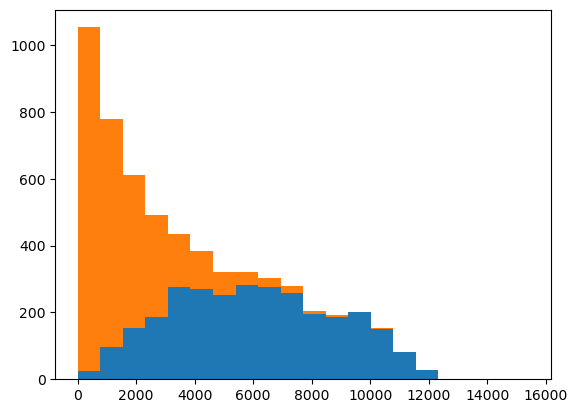

In [61]:
plt.hist([df['registered'], df['casual']], stacked=True, bins=20)
plt.show()


In [27]:

casual = alt.Chart(df).mark_bar().encode(
    alt.X('casual:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Y('count()'),
    color = alt.value('goldenrod')
).properties(width = 200, height = 200, title = 'Distribution of Casual customers')

registered = alt.Chart(df).mark_bar().encode(
    alt.X('registered:Q', bin = alt.BinParams(maxbins = 20)),
    alt.Y('count()'),
    color = alt.value('goldenrod')
    
).properties(width = 200, height = 200, title = 'Distribution of Registered customers')


chart = casual | registered

chart

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [29]:
chart.save('project_histogram.html')

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


In [3]:
weather_conditions = ['wt_fog', 'wt_rain', 'wt_thunder', 'wt_sleet', 'wt_hail',
                      'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
                      'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
                      'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown']
weather_counts = df[weather_conditions].sum().reset_index()
weather_counts.columns = ['weather_type', 'count']

In [15]:
weather_counts

weather_type   count
0              wt_fog  1503.0
1             wt_rain   406.0
2          wt_thunder   694.0
3            wt_sleet   129.0
4             wt_hail    50.0
5            wt_glaze   153.0
6             wt_haze   705.0
7       wt_drift_snow     7.0
8        wt_high_wind   258.0
9             wt_mist   371.0
10         wt_drizzle   128.0
11            wt_rain   406.0
12     wt_freeze_rain     5.0
13            wt_snow    84.0
14      wt_ground_fog    36.0
15         wt_ice_fog    10.0
16  wt_freeze_drizzle     4.0
17         wt_unknown     1.0

In [33]:
import altair as alt
options = [None, 'wt_fog', 'wt_rain', 'wt_thunder', 'wt_sleet', 'wt_hail',
                      'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
                      'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
                      'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown']

labels = ['All', 'wt_fog', 'wt_rain', 'wt_thunder', 'wt_sleet', 'wt_hail',
                      'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
                      'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
                      'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown']

input_dropdown = alt.binding_select(options = options, labels = labels, name = 'Weather Type')

selection = alt.selection_point(fields = ['wt_fog', 'wt_rain', 'wt_thunder', 'wt_sleet', 'wt_hail',
                      'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
                      'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
                      'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown'], bind = input_dropdown)

alt.Chart(df).mark_point().encode(
    alt.Y('total_cust:Q'),
    alt.X('wind:Q', title = 'Date'),
    color = alt.condition(selection, alt.value('blue'), alt.value('grey')),
    opacity = alt.condition(selection, alt.value(1), alt.value(0.1))
).properties(
    title = 'Average Temperature in Seattle from 2012-2015',
    width = 700    
).add_params(
    selection
)

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [13]:
df.describe()

temp_avg     temp_min     temp_max  temp_observ       precip  \
count  2101.000000  2922.000000  2922.000000  2922.000000  2922.000000   
mean     14.419007     8.506468    19.015689    11.069243     3.435734   
min     -12.100000   -16.993750    -7.980000   -15.658333     0.000000   
25%       6.566667     0.516538    11.081562     3.013068     0.005510   
50%      15.433333     8.504911    19.992857    11.619091     0.271504   
75%      23.066667    17.338393    27.874583    19.767083     2.885381   
max      31.733333    26.206250    37.850000    28.666667   118.789796   
std       9.556401     9.473941     9.835524     9.481232     8.183658   

              wind  wt_fog  wt_heavy_fog  wt_thunder  wt_sleet  ...  wt_snow  \
count  2922.000000  1503.0         208.0       694.0     129.0  ...     84.0   
mean      3.162898     1.0           1.0         1.0       1.0  ...      1.0   
min       0.375000     1.0           1.0         1.0       1.0  ...      1.0   
25%       2.200000     1.0           1.0         1.0       1.0  ...      1.0   
50%       2.900000     1.0           1.0         1.0       1.0  ...      1.0   
75%       3.875000     1.0           1.0         1.0       1.0  ...      1.0   
max      12.750000     1.0           1.0         1.0       1.0  ...      1.0   
std       1.379582     0.0           0.0         0.0       0.0  ...      0.0   

       wt_ground_fog  wt_ice_fog  wt_freeze_drizzle  wt_unknown        casual  \
count           36.0        10.0                4.0         1.0   2918.000000   
mean             1.0         1.0                1.0         1.0   1679.776217   
min              1.0         1.0                1.0         1.0      2.000000   
25%              1.0         1.0                1.0         1.0    512.250000   
50%              1.0         1.0                1.0         1.0   1220.500000   
75%              1.0         1.0                1.0         1.0   2357.250000   
max              1.0         1.0                1.0         1.0  10173.000000   
std              0.0         0.0                0.0         NaN   1560.762932   

         registered    total_cust  holiday        datetime_date  
count   2918.000000   2918.000000     89.0                 2922  
mean    6046.297121   7726.073338      1.0  2014-12-31 12:00:00  
min       19.000000     21.000000      1.0  2011-01-01 00:00:00  
25%     3839.250000   4628.500000      1.0  2012-12-31 06:00:00  
50%     5964.000000   7442.500000      1.0  2014-12-31 12:00:00  
75%     8187.500000  10849.500000      1.0  2016-12-30 18:00:00  
max    15419.000000  19113.000000      1.0  2018-12-31 00:00:00  
std     2756.888032   3745.220092      0.0                  NaN  

[8 rows x 29 columns]

In [2]:
df.dtypes

date                  object
temp_avg             float64
temp_min             float64
temp_max             float64
temp_observ          float64
precip               float64
wind                 float64
wt_fog               float64
wt_heavy_fog         float64
wt_thunder           float64
wt_sleet             float64
wt_hail              float64
wt_glaze             float64
wt_haze              float64
wt_drift_snow        float64
wt_high_wind         float64
wt_mist              float64
wt_drizzle           float64
wt_rain              float64
wt_freeze_rain       float64
wt_snow              float64
wt_ground_fog        float64
wt_ice_fog           float64
wt_freeze_drizzle    float64
wt_unknown           float64
casual               float64
registered           float64
total_cust           float64
holiday              float64
dtype: object

In [5]:
from datetime import datetime, timedelta

# create a list of dates that are in the datetime object
datetime_list = []
for index in df.index:
    datetime_list.append(datetime.strptime(df['date'][index], '%Y-%m-%d'))

# create a new attribute in dataframe which has the datetime objects
df['datetime_date'] = datetime_list

df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01       NaN -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02       NaN  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03       NaN -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04       NaN -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05       NaN -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_snow  wt_ground_fog  wt_ice_fog  \
0     1.0           NaN         NaN  ...      NaN            NaN         NaN   
1     1.0           1.0         NaN  ...      NaN            NaN         NaN   
2     NaN           NaN         NaN  ...      NaN            NaN         NaN   
3     NaN           NaN         NaN  ...      NaN            NaN         NaN   
4     NaN           NaN         NaN  ...      NaN            NaN         NaN   

   wt_freeze_drizzle  wt_unknown  casual  registered  total_cust  holiday  \
0                NaN         NaN   330.0       629.0       959.0      NaN   
1                NaN         NaN   130.0       651.0       781.0      NaN   
2                NaN         NaN   120.0      1181.0      1301.0      NaN   
3                NaN         NaN   107.0      1429.0      1536.0      NaN   
4                NaN         NaN    82.0      1489.0      1571.0      NaN   

   datetime_date  
0     2011-01-01  
1     2011-01-02  
2     2011-01-03  
3     2011-01-04  
4     2011-01-05  

[5 rows x 30 columns]

In [7]:
# define a function that can determine the season given a datetime object
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'fall': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['fall']:
        return 'fall'
    else:
        return 'winter'

# add season as a new attribute in the dataframe
df['season'] = df.datetime_date.map(season_of_date)

df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01       NaN -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02       NaN  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03       NaN -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04       NaN -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05       NaN -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_ground_fog  wt_ice_fog  \
0     1.0           NaN         NaN  ...            NaN         NaN   
1     1.0           1.0         NaN  ...            NaN         NaN   
2     NaN           NaN         NaN  ...            NaN         NaN   
3     NaN           NaN         NaN  ...            NaN         NaN   
4     NaN           NaN         NaN  ...            NaN         NaN   

   wt_freeze_drizzle  wt_unknown  casual  registered  total_cust  holiday  \
0                NaN         NaN   330.0       629.0       959.0      NaN   
1                NaN         NaN   130.0       651.0       781.0      NaN   
2                NaN         NaN   120.0      1181.0      1301.0      NaN   
3                NaN         NaN   107.0      1429.0      1536.0      NaN   
4                NaN         NaN    82.0      1489.0      1571.0      NaN   

   datetime_date  season  
0     2011-01-01  winter  
1     2011-01-02  winter  
2     2011-01-03  winter  
3     2011-01-04  winter  
4     2011-01-05  winter  

[5 rows x 31 columns]

In [8]:
# Columns for weather conditions
weather_columns = [
    'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet',
    'wt_hail', 'wt_glaze', 'wt_haze', 'wt_drift_snow',
    'wt_high_wind', 'wt_mist', 'wt_drizzle', 'wt_rain',
    'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
    'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown'
]

# Fill missing values
df[weather_columns] = df[weather_columns].fillna(0)
df['holiday'] = df['holiday'].fillna(0)

df.head()



date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01       NaN -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02       NaN  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03       NaN -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04       NaN -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05       NaN -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_ground_fog  wt_ice_fog  \
0     1.0           0.0         0.0  ...            0.0         0.0   
1     1.0           1.0         0.0  ...            0.0         0.0   
2     0.0           0.0         0.0  ...            0.0         0.0   
3     0.0           0.0         0.0  ...            0.0         0.0   
4     0.0           0.0         0.0  ...            0.0         0.0   

   wt_freeze_drizzle  wt_unknown  casual  registered  total_cust  holiday  \
0                0.0         0.0   330.0       629.0       959.0      0.0   
1                0.0         0.0   130.0       651.0       781.0      0.0   
2                0.0         0.0   120.0      1181.0      1301.0      0.0   
3                0.0         0.0   107.0      1429.0      1536.0      0.0   
4                0.0         0.0    82.0      1489.0      1571.0      0.0   

   datetime_date  season  
0     2011-01-01  winter  
1     2011-01-02  winter  
2     2011-01-03  winter  
3     2011-01-04  winter  
4     2011-01-05  winter  

[5 rows x 31 columns]

In [9]:

df['temp_avg'] = (df['temp_min'] + df['temp_max'])/2


In [12]:
df.dropna(subset=['total_cust'], inplace=True)


False

In [31]:
import altair as alt

# alt.Chart(df).mark_line().transform_calculate(
#     avg_temp = '(datum.temp_min + datum.temp_max) /2'
# ).encode(
#     alt.Y('avg_temp:Q', title = 'Average Temperature'),
#     alt.X('date:T', title = 'Date'),
# ).properties(
#     title = 'Average Temperature in Seattle from 2012-2015',
#     width = 700
# )


# # create selection interval

# # create chart of income vs health where users can select an interval
# health_chart = alt.Chart(gapminder).mark_circle().encode(
#     alt.X('health:Q'),
#     alt.Y('income:Q'),
#     alt.Tooltip(['country:N', 'population:Q']),
#     color = alt.condition(selection, 'region:N', alt.value('grey')),
#     opacity = alt.condition(selection, alt.value(1), alt.value(0.1))
# ).add_params(
#     selection
# ).properties(
#     title = 'Avg personal income vs health by Region'
# )

# # create chart of income vs population with only selected data
# pop_chart = alt.Chart(gapminder).mark_circle().encode(
#     alt.Y('income:Q'),
#     alt.X('population:Q'),
#     alt.Tooltip(['country:N', 'population:Q']),
#     color = alt.condition(selection, 'region:N', alt.value('grey')),
#     opacity = alt.condition(selection, alt.value(1), alt.value(0.1))
# ).transform_filter(
#     selection
# ).properties(
#     title = 'Avg personal income vs population by Region'
# )


# # put charts side by side
# chart1 | chart2


selection = alt.selection_interval()


line_chart = alt.Chart(df).mark_line().encode(
    alt.Y('total_cust:Q', title = 'Number of bike share customers'),
    alt.X('date:T', title = 'Date'),
    alt.Tooltip(['date:T', 'total_cust:Q', 'temp_max:Q']),
    color = alt.value('brown')
).properties(
    title = 'Number of bike share customers from 2011-2018',
    width = 700
).add_params(
    selection
)

bar_chart = alt.Chart(df).mark_bar().encode(
    alt.Y('count()'),
    alt.X('season:N'),
    color = alt.value('brown')
).transform_filter(
    selection
).properties(
    title = 'Season'
)

chart2 = line_chart | bar_chart

chart2

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [33]:
chart2.save('linechart.html')

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


In [6]:
df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01       NaN -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02       NaN  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03       NaN -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04       NaN -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05       NaN -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_ground_fog  wt_ice_fog  \
0     1.0           NaN         NaN  ...            NaN         NaN   
1     1.0           1.0         NaN  ...            NaN         NaN   
2     NaN           NaN         NaN  ...            NaN         NaN   
3     NaN           NaN         NaN  ...            NaN         NaN   
4     NaN           NaN         NaN  ...            NaN         NaN   

   wt_freeze_drizzle  wt_unknown  casual  registered  total_cust  holiday  \
0                NaN         NaN   330.0       629.0       959.0      NaN   
1                NaN         NaN   130.0       651.0       781.0      NaN   
2                NaN         NaN   120.0      1181.0      1301.0      NaN   
3                NaN         NaN   107.0      1429.0      1536.0      NaN   
4                NaN         NaN    82.0      1489.0      1571.0      NaN   

   datetime_date  season  
0     2011-01-01  winter  
1     2011-01-02  winter  
2     2011-01-03  winter  
3     2011-01-04  winter  
4     2011-01-05  winter  

[5 rows x 31 columns]

C:\Users\ssraj\AppData\Local\Temp\ipykernel_17260\2168950052.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


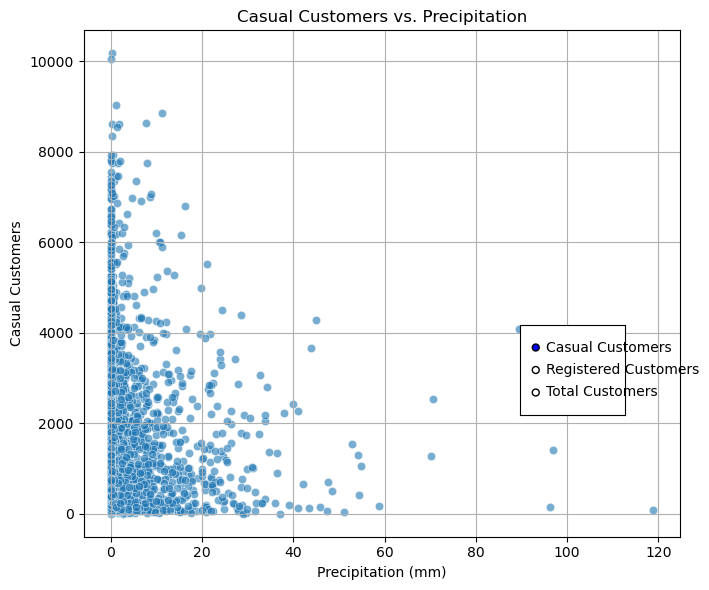

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import RadioButtons

# # Load  dataset
# df = pd.read_csv('/content/bike_sharing_dataset.csv.xls')

# Columns for weather conditions
weather_columns = [
    'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet',
    'wt_hail', 'wt_glaze', 'wt_haze', 'wt_drift_snow',
    'wt_high_wind', 'wt_mist', 'wt_drizzle', 'wt_rain',
    'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
    'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown'
]

# Fill missing values
df[weather_columns] = df[weather_columns].fillna(0)

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Initialize the scatter plot with Casual Customers by default
scatter = sns.scatterplot(x='precip', y='casual', data=df, ax=ax, alpha=0.6)
ax.set_title('Casual Customers vs. Precipitation')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('Casual Customers')
ax.grid()

def update_plot(label):
    ax.clear()

    if label == 'Casual Customers':
        sns.scatterplot(x='precip', y='casual', data=df, ax=ax, alpha=0.6)
        ax.set_title('Casual Customers vs. Precipitation')
        ax.set_ylabel('Casual Customers')
    elif label == 'Registered Customers':
        sns.scatterplot(x='precip', y='registered', data=df, ax=ax, alpha=0.6)
        ax.set_title('Registered Customers vs. Precipitation')
        ax.set_ylabel('Registered Customers')
    elif label == 'Total Customers':
        df['total'] = df['casual'] + df['registered']  # Calculate total customers
        sns.scatterplot(x='precip', y='total', data=df, ax=ax, alpha=0.6)
        ax.set_title('Total Customers vs. Precipitation')
        ax.set_ylabel('Total Customers')

    ax.set_xlabel('Precipitation (mm)')
    ax.grid()
    fig.canvas.draw()

# Create radio buttons
radio = RadioButtons(ax=plt.axes([0.75, 0.3, 0.15, 0.15]), labels=['Casual Customers', 'Registered Customers', 'Total Customers'])
radio.on_clicked(update_plot)

plt.tight_layout()
plt.show()

In [13]:


df.head()

date  temp_avg  temp_min   temp_max  temp_observ    precip   wind  \
0  2011-01-01       NaN -1.566667  11.973333     2.772727  0.069333  2.575   
1  2011-01-02       NaN  0.880000  13.806667     7.327273  1.037349  3.925   
2  2011-01-03       NaN -3.442857   7.464286    -3.060000  1.878824  3.625   
3  2011-01-04       NaN -5.957143   4.642857    -3.100000  0.000000  1.800   
4  2011-01-05       NaN -4.293333   6.113333    -1.772727  0.000000  2.950   

   wt_fog  wt_heavy_fog  wt_thunder  ...  wt_freeze_rain  wt_snow  \
0     1.0           0.0         0.0  ...             0.0      0.0   
1     1.0           1.0         0.0  ...             0.0      0.0   
2     0.0           0.0         0.0  ...             0.0      0.0   
3     0.0           0.0         0.0  ...             0.0      0.0   
4     0.0           0.0         0.0  ...             0.0      0.0   

   wt_ground_fog  wt_ice_fog  wt_freeze_drizzle  wt_unknown  casual  \
0            0.0         0.0                0.0         0.0   330.0   
1            0.0         0.0                0.0         0.0   130.0   
2            0.0         0.0                0.0         0.0   120.0   
3            0.0         0.0                0.0         0.0   107.0   
4            0.0         0.0                0.0         0.0    82.0   

   registered  total_cust  holiday  
0       629.0       959.0      NaN  
1       651.0       781.0      NaN  
2      1181.0      1301.0      NaN  
3      1429.0      1536.0      NaN  
4      1489.0      1571.0      NaN  

[5 rows x 29 columns]

In [25]:
import altair as alt


weather_bar_chart = alt.Chart(df).mark_bar().encode(
    x='weather_type:N',
    y='mean(total_cust):Q',
    color='weather_type:N',
    opacity=alt.OpacityValue(0.5),
    tooltip=['weather_type:N', 'mean(total_cust):Q']
).properties(
    title="Impact of Weather Types on Total Customers"
)

weather_conditions = ['wt_fog', 'wt_rain', 'wt_thunder', 'wt_sleet', 'wt_hail']
weather_counts = df[weather_conditions].sum().reset_index()
weather_counts.columns = ['weather_type', 'count']

# Pie chart visualization
weather_pie_chart = alt.Chart(weather_counts).mark_arc().encode(
    theta=alt.Theta(field="count", type="quantitative"),
    color=alt.Color(field="weather_type", type="nominal"),
    tooltip=['weather_type:N', 'count:Q']
).properties(
    title="Proportion of Days with Different Weather Conditions"
)

# Display both charts
#(weather_bar_chart & weather_pie_chart).show()

weather_bar_chart | weather_pie_chart

C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\ssraj\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

Conclusion:

In summary, this project's work will be useful for having a better understanding of the factors that impact bike share usage in Washington DC. These visualizations suggest that increases in bike share usage could be associated with:
- spring/summer seasons
- registered customers
- a higher maximum temperature (but not too high)
- low precipitation
- not certain weather types (ex. thunder, fog)

Ultimately, this knowledge can be critical in informing when the bike share system is more likely to be used, and can help figure out how to increase user retention. For example, the city could put out an ad campaign to encourage people to register for the bike share, which could increase the likelihood that they will use the system. Additionally, they could switch out the bikes during colder seasons with tires with better traction for snow/sleet weather, or provide fog headlamps, which could also encourage more people to use the bike share on off weather days. 